In [3]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
customers.isnull().sum()  # Missing values in Customers
products.isnull().sum()   # Missing values in Products
transactions.isnull().sum()  # Missing values in Transactions

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [20]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Verify data types
print(customers.dtypes)
print(transactions.dtypes)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
TransactionID                 object
CustomerID                    object
ProductID                     object
TransactionDate       datetime64[ns]
Quantity                       int64
TotalValue                   float64
Price                        float64
CustomerSignupDate    datetime64[ns]
dtype: object


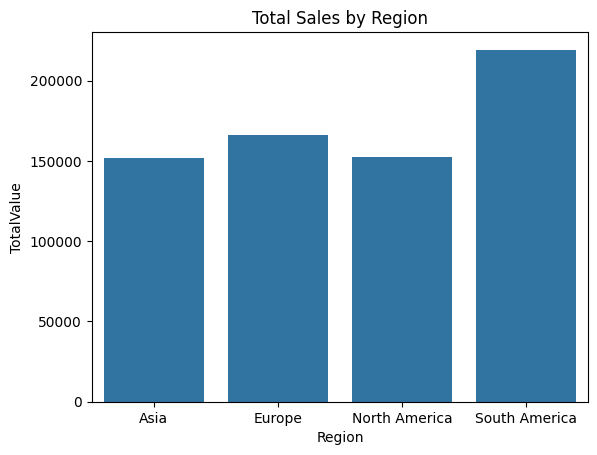

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

region_sales = transactions.groupby('CustomerID')['TotalValue'].sum()
region_sales = pd.merge(customers, region_sales, on='CustomerID', how='left')

# Sales by region
region_sales_summary = region_sales.groupby('Region')['TotalValue'].sum().reset_index()
sns.barplot(x='Region', y='TotalValue', data=region_sales_summary)
plt.title('Total Sales by Region')
plt.show()


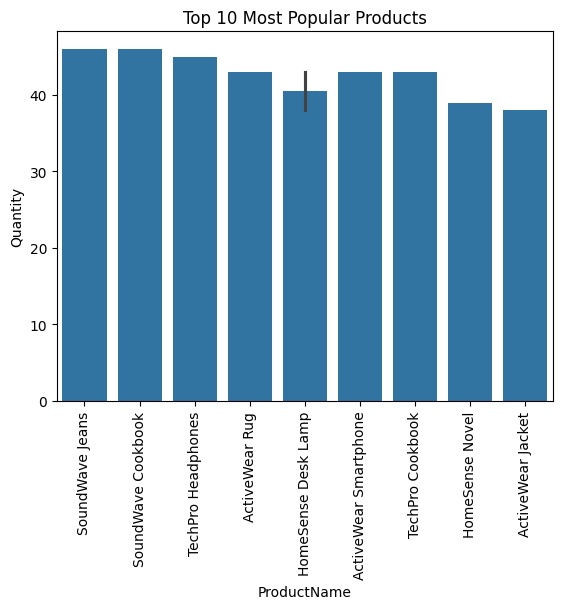

In [13]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum()
product_sales = pd.merge(products, product_sales, on='ProductID', how='left')

top_products = product_sales.sort_values(by='Quantity', ascending=False).head(10)
sns.barplot(x='ProductName', y='Quantity', data=top_products)
plt.title('Top 10 Most Popular Products')
plt.xticks(rotation=90)
plt.show()


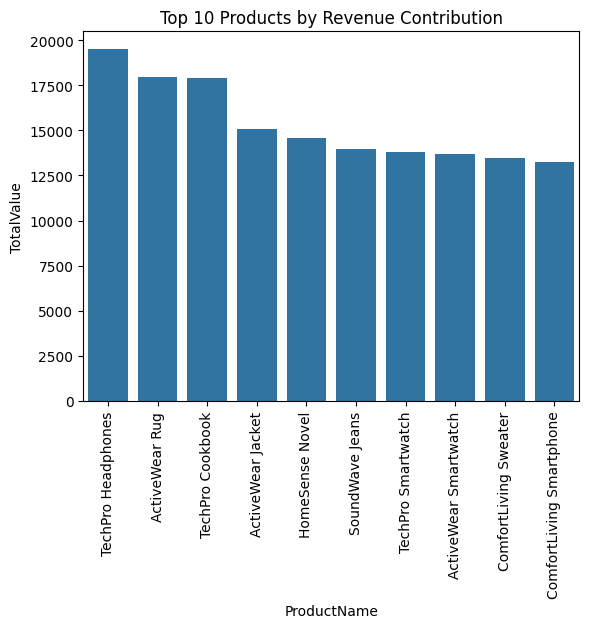

In [17]:
# Group by product and calculate total sales
product_revenue = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
product_revenue = pd.merge(product_revenue, products[['ProductID', 'ProductName']], on='ProductID', how='left')

# Sort by total sales and show top products by revenue
top_revenue_products = product_revenue.sort_values(by='TotalValue', ascending=False).head(10)

sns.barplot(x='ProductName', y='TotalValue', data=top_revenue_products)
plt.title('Top 10 Products by Revenue Contribution')
plt.xticks(rotation=90)
plt.show()

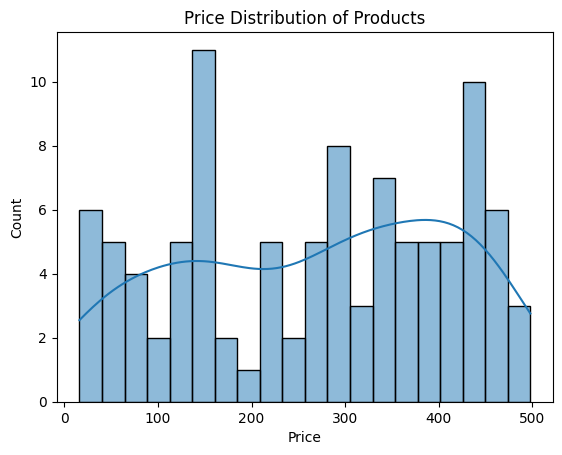

In [15]:
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Price Distribution of Products')
plt.show()

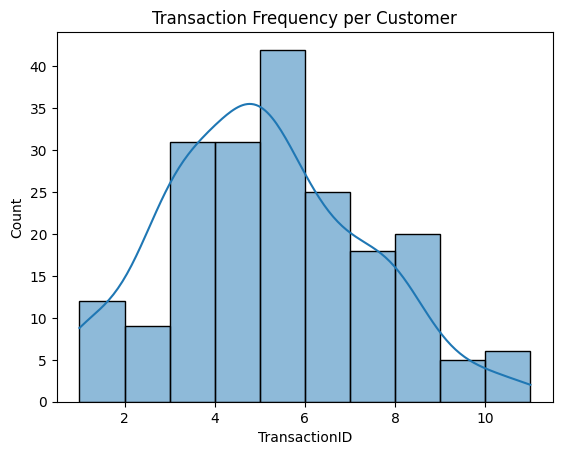

In [16]:
# Average transaction value by customer
avg_transaction = transactions.groupby('CustomerID')['TotalValue'].mean()

# Transaction frequency by customer
transaction_frequency = transactions.groupby('CustomerID')['TransactionID'].count()
sns.histplot(transaction_frequency, kde=True)
plt.title('Transaction Frequency per Customer')
plt.show()
